# Self response absolute plot

In [5]:
# Import modules

from matplotlib import pyplot as plt
import os

import pickle

%matplotlib inline

In [6]:
# Using the AAPL stock
ticker_i = 'AAPL'
days = ['07', '08', '09', '10', '11']
tau_val = 1000
t_step = 1000

In [7]:
def self_response_abs_plot(ticker, days, tau_val, t_step):
    """
    Plot the self response absolute during an interval of time (days) in
    independent plots in a figure. The data is loaded from the self response
    data results.
        :param ticker: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param days: string with the days to be analized
         (i.e ['07', '08', '09'])
        :param tau_val: maximum time lag to be analyzed
        :param t_step: time step in the data in ms
    """

    plt.figure(figsize=(9, 16))
    plt.subplots_adjust(hspace=0, wspace=0)

    for i, day in enumerate(days):

        print('Processing data for the stock ' + ticker + ' the day ' + day
          + ' March, 2016')

        plot = pickle.load(open(
            '../Data/self_response_abs_data_{}ms/self_abs_201603{}_{}i_{}ms.pickl'
            .format(t_step, day, ticker, t_step), 'rb'))

        plt.subplot(len(days), 1, i+1)
        plt.semilogx(plot, '-g', label='Stock i {} - Day {}'
                     .format(ticker, day))
        plt.xlabel(r'Time lag $[\tau]$')
        plt.ylabel(r'Self response $ R_{ii} (\tau) $')
        plt.legend(loc='best')
        plt.title('Self response absolute - {} - {}ms'.format(ticker, t_step))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        plt.grid(True)
        plt.tight_layout()

    if (not os.path.isdir('../Data/self_response_abs_plot_{}ms/'.format(t_step))):
        os.mkdir('../Data/self_response_abs_plot_{}ms/'.format(t_step))
        print('Folder to save plot created')

    plt.savefig('../Data/self_response_abs_plot_{}ms/self_response_abs_{}_{}ms.png'
                .format(t_step, ticker, t_step))

    return None

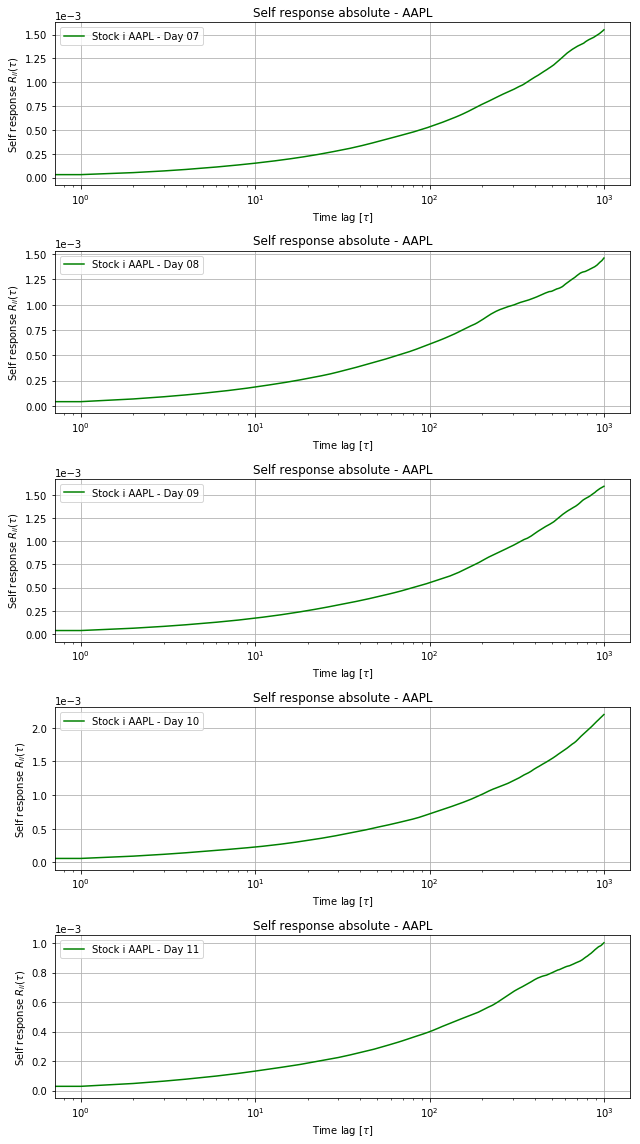

In [8]:
self_response_abs_plot(ticker_i, days, tau_val, t_step)